In [179]:
import keras
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [237]:
data_in = np.array([[-5,0],[2,0],[-3,0],[4,0]])

data_filter = np.array([[2],[-3]])

logic = np.array([[0],[0],[0],[0]])

print(data_filter)

[[ 2]
 [-3]]


In [238]:
data_in[0]

array([-5,  0])

In [239]:
for i in range(len(data_in)):
    
    point = data_in[i]
    
    for j in range(len(data_filter)):
        if point[0]-data_filter[j]==0:
            point[1]=j+1*2
    
    if point[1] > 0 : 
        logic[i]=1
        data_in[i]=point

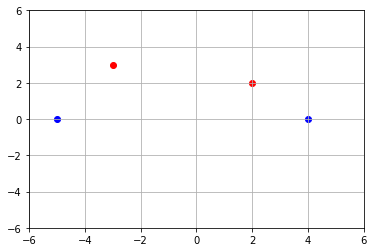

In [240]:
plt.axis([-6, 6, -6, 6])
plt.grid()
for i in range(len(data_in)):
    point = data_in[i]
    color = "r"
    if logic[i]==0: color="b"
    else: color="r"
    plt.scatter(point[0],point[1],c=color)

In [241]:
model = keras.models.Sequential(layers=[
    keras.layers.Dense(input_dim=2, units=2),
    keras.layers.Activation(keras.activations.sigmoid),
    keras.layers.Dense(units=1),
    keras.layers.Activation(keras.activations.sigmoid)
])

model.compile(optimizer=keras.optimizers.SGD(lr=.5), loss='mse')

In [242]:
model.weights

[<tf.Variable 'dense_29/kernel:0' shape=(2, 2) dtype=float32_ref>,
 <tf.Variable 'dense_29/bias:0' shape=(2,) dtype=float32_ref>,
 <tf.Variable 'dense_30/kernel:0' shape=(2, 1) dtype=float32_ref>,
 <tf.Variable 'dense_30/bias:0' shape=(1,) dtype=float32_ref>]

In [243]:
keras.backend.eval(model.weights[0])

array([[-0.0186578 , -0.39413339],
       [ 0.2414403 ,  0.23877704]], dtype=float32)

In [244]:
model.fit(data_in, logic, epochs=1000, verbose=False)

In [245]:
model.predict(np.array([[1,0]]))

array([[ 0.03901592]], dtype=float32)